In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.random import set_seed
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(X_train, y_train) , (X_test, y_test) = load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [14]:
# funkcja do wizualizacji dokładności sieci
def plot_accuracy(result):
  plt.figure(figsize=(12,6))
  plt.plot(result.history["accuracy"], c="r")
  plt.plot(result.history["val_accuracy"], c="b")
  plt.legend(["accuracy", "val_accuracy"])
  plt.show()

In [ ]:
# budowanie sieci CNN

X_train_cnn = X_train.reshape( X_train.shape[0], 28, 28, 1 )
X_val_cnn = X_val.reshape( X_val.shape[0], 28, 28, 1 )
X_test_cnn = X_test.reshape( X_test.shape[0], 28, 28, 1 )

set_seed(0)
model = Sequential()

model.add( Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2))  )

model.add( Dropout(.2) )

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

#kompilacja sieci
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
result = model.fit(X_train_cnn, y_train, epochs=15, validation_data=(X_val_cnn, y_val) )

In [12]:
model.evaluate(X_test_cnn, y_test, verbose=0)

[0.0857352465391159, 0.9858999848365784]

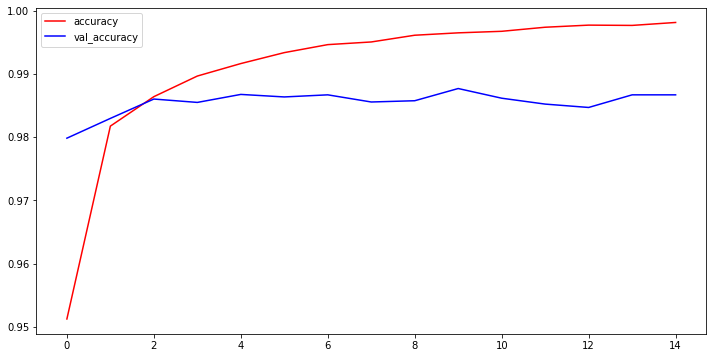

In [15]:
plot_accuracy(result)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [17]:
# budowanie sieci CNN - v2

X_train_cnn = X_train.reshape( X_train.shape[0], 28, 28, 1 )
X_val_cnn = X_val.reshape( X_val.shape[0], 28, 28, 1 )
X_test_cnn = X_test.reshape( X_test.shape[0], 28, 28, 1 )

set_seed(0)
model = Sequential()

model.add( Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2))  )
model.add( Dropout(.2) )

model.add( Conv2D(128, kernel_size=(3,3),  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2))  )
model.add( Dropout(.2) )

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

#kompilacja sieci
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
result = model.fit(X_train_cnn, y_train, epochs=15, validation_data=(X_val_cnn, y_val) )

Epoch 1/15
1407/1407 [==============================] - 17s 11ms/step - loss: 0.1413 - accuracy: 0.9561 - val_loss: 0.0493 - val_accuracy: 0.9846
Epoch 2/15
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0478 - val_accuracy: 0.9869
Epoch 3/15
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0491 - val_accuracy: 0.9867
Epoch 4/15
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0327 - accuracy: 0.9902 - val_loss: 0.0445 - val_accuracy: 0.9887
Epoch 5/15
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0300 - accuracy: 0.9911 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 6/15
1407/1407 [==============================] - 15s 10ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.0422 - val_accuracy: 0.9893
Epoch 7/15
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0240 - accuracy: 0.9934 - val_loss: 0.0395 -

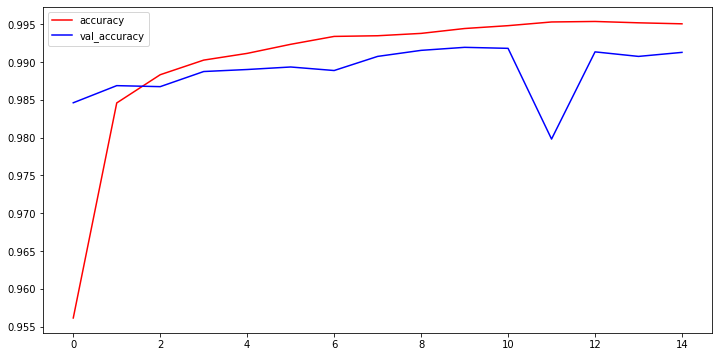

In [18]:
plot_accuracy(result)

In [21]:
model.summary()
model.save("cnn-mnist-2.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 128)        

In [20]:
import tensorflow as tf

In [22]:
# budowanie sieci CNN - v3

X_train_cnn = X_train.reshape( X_train.shape[0], 28, 28, 1 )
X_val_cnn = X_val.reshape( X_val.shape[0], 28, 28, 1 )
X_test_cnn = X_test.reshape( X_test.shape[0], 28, 28, 1 )

set_seed(0)
model = Sequential()

model.add( Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2))  )
model.add( Dropout(.2) )

model.add( Conv2D(128, kernel_size=(3,3),  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2))  )
model.add( Dropout(.2) )


model.add( Conv2D(64, kernel_size=(3,3),  activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2))  )
model.add( Dropout(.2) )

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

es = tf.keras.callbacks.EarlyStopping(min_delta=0.01, patience=5, verbose=1)

#kompilacja sieci
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
result = model.fit(X_train_cnn, y_train, epochs=15, validation_data=(X_val_cnn, y_val), callbacks=[es] )

Epoch 1/15
1407/1407 [==============================] - 20s 13ms/step - loss: 0.3128 - accuracy: 0.9012 - val_loss: 0.0881 - val_accuracy: 0.9729
Epoch 2/15
1407/1407 [==============================] - 17s 12ms/step - loss: 0.1133 - accuracy: 0.9661 - val_loss: 0.0749 - val_accuracy: 0.9781
Epoch 3/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0890 - accuracy: 0.9739 - val_loss: 0.0677 - val_accuracy: 0.9805
Epoch 4/15
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0742 - accuracy: 0.9787 - val_loss: 0.0645 - val_accuracy: 0.9821
Epoch 5/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0722 - accuracy: 0.9795 - val_loss: 0.0590 - val_accuracy: 0.9826
Epoch 6/15
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0716 - accuracy: 0.9802 - val_loss: 0.0512 - val_accuracy: 0.9853
Epoch 7/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0702 - accuracy: 0.9810 - val_loss: 0.0593 -

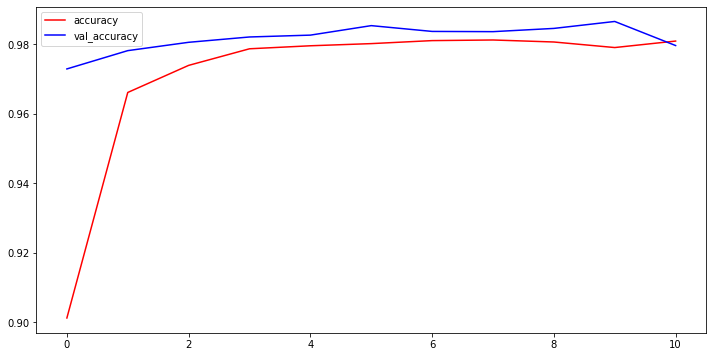

In [23]:
plot_accuracy(result)

In [30]:
model2 = tf.keras.models.load_model("cnn-mnist-2.h5")

In [60]:
IMG_INDEX = 666
y_test[IMG_INDEX]

7

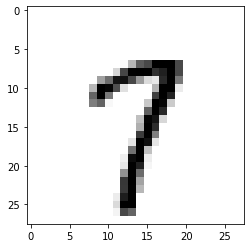

In [61]:
plt.imshow(X_test[IMG_INDEX], "gray_r")

In [62]:
model.predict( X_test[IMG_INDEX].reshape(1,28,28,1) )

array([[3.6687768e-04, 2.9651036e-03, 4.4234474e-03, 4.8529755e-04,
        3.8815179e-04, 5.9653325e-05, 1.5516108e-07, 9.7601414e-01,
        8.4091378e-05, 1.5213164e-02]], dtype=float32)

In [63]:
np.argmax( model.predict( X_test[IMG_INDEX].reshape(1,28,28,1) ) )

7

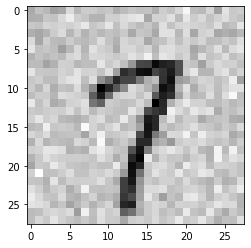

In [64]:
np.random.seed(0)
tmp = X_test[IMG_INDEX] + np.random.normal(0.5, 0.1, (28,28))
plt.imshow(tmp, 'gray_r')

In [65]:
np.argmax( model.predict( tmp.reshape(1,28,28,1) ) ) , np.argmax( model2.predict( tmp.reshape(1,28,28,1) ) )

(8, 7)